In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random
import uuid
import matplotlib.pyplot as plt


In [ ]:
def random_date(start, end):
 return start + timedelta(
 seconds=random.randint(0, int((end - start).total_seconds()))
 )

Генерация данных о клиентах

In [ ]:
# Список клиентов
clients = []
client_city= ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Рязань', 'Омск']
# Генерируем 100 клиентов
for i in range(100):
  client = {
  'client_id': str(uuid.uuid4()), # Генерация уникального client_id
  'name': f'Клиент {i}',
  'birthday': random_date(start_date, end_date).strftime('%Y-%m-%d'),
  'city': random.choice(client_city)
  }
  clients.append(client)

# Создание DataFrame для клиентов
clients_df = pd.DataFrame(clients)
clients_df.to_csv('clients.csv', index=False)
print("Файл clients.csv создан")



Файл clients.csv создан


Генерация данных о заказах

In [ ]:
orders_2023 = []
start_order = datetime(2023, 1, 1)
end_order = datetime(2023, 12, 31)

# Генерируем 1000 заказов
for a in range(1000):
  client = random.choice(clients) # Выбор случайного клиента из списка
  order = {
  'order_number': f'O{a:03d}', # Используем a для формирования номера заказа
  'client_id': client['client_id'],
  'price': random.randint(15, 1000),
  'date': random_date(start_order, end_order).strftime('%Y-%m-%d')
  }
  orders_2023.append(order)

# Создание DataFrame для заказов
df_orders23 = pd.DataFrame(orders_2023)

# Сохранение в Excel
df_orders23.to_excel('orders23.xlsx', index=False)
print("Файл orders23.xlsx создан")

Файл orders23.xlsx создан


In [ ]:
orders_2022 = []
start_order = datetime(2022, 1, 1)
end_order = datetime(2022, 12, 31)

# Генерируем 850 заказов
for a in range(850):
  client = random.choice(clients) # Выбор случайного клиента из списка
  order = {
  'order_number': f'A{a:03d}', # Используем a для формирования номера заказа
  'client_id': client['client_id'],
  'price': random.randint(10, 1000),
  'date': random_date(start_order, end_order).strftime('%Y-%m-%d')
  }
  orders_2022.append(order)

# Создание DataFrame для заказов
df_orders22 = pd.DataFrame(orders_2022)

# Сохранение в Excel
df_orders22.to_excel('orders22.xlsx', index=False)
print("Файл orders22.xlsx создан")

Файл orders22.xlsx создан


Генерация данных о скидках

In [ ]:
discounts = []

for a in client_city:
 discount = {
 'city': a,
 'discount_rate': random.randint(10, 50)
 }
 discounts.append(discount)

with open('discounts.json', 'w', encoding='utf-8') as f:
 json.dump(discounts, f, ensure_ascii=False, indent=4)
print("Файл discounts.json создан")

Файл discounts.json создан


Консолидация данных

In [ ]:
df_clients = pd.read_csv('clients.csv')
print("Данные о клиентах:")
print(df_clients.head())


Данные о клиентах:
                              client_id      name    birthday         city
0  f54c11c1-a696-4c45-9ffa-9a2c1e702cb3  Клиент 0  1991-02-04  Новосибирск
1  fda8a72b-0d3e-4a40-85c6-9137d7d86ba0  Клиент 1  1980-11-18  Новосибирск
2  6a7f3add-e606-4442-8fb4-e6d0f1fb5096  Клиент 2  2002-02-17       Рязань
3  77ba80e0-24ae-4de7-9e35-39c34f58dbaa  Клиент 3  1984-11-10       Москва
4  2e17807d-f5b8-40d0-86e7-83650f1e676f  Клиент 4  1998-03-20  Новосибирск


In [ ]:
df_orders23 = pd.read_excel('orders23.xlsx')
print("Данные о заказах:")
print(df_orders23.head())


Данные о заказах:
  order_number                             client_id  price        date
0         O000  e960b580-dfab-4ade-8775-573f51141494    914  2023-06-09
1         O001  7ff29597-ea8a-4d1e-b775-4f459e2f2ad9    687  2023-02-03
2         O002  caa30c78-aa6a-4382-8d21-188952c4083b    122  2023-08-19
3         O003  1b6bce7c-8a6d-474d-853c-dcdc73191cce    511  2023-01-03
4         O004  5756bdb5-b700-43e6-8b6c-dfb7e35bf786    382  2023-10-03


In [ ]:
df_orders22 = pd.read_excel('orders22.xlsx')
print("Данные о заказах:")
print(df_orders22.head())

Данные о заказах:
  order_number                             client_id  price        date
0         A000  815fbf47-4a93-4bd1-8165-4d59a9945990    568  2022-08-30
1         A001  62612b69-051a-4e9c-9570-5b0aea82bb2d    745  2022-03-07
2         A002  7d794c88-a26e-42a4-95ce-96868208d95a    349  2022-01-27
3         A003  1cbd1897-fb4d-42b4-be34-42340bacdd12    249  2022-10-07
4         A004  b5d19d0e-b107-44bf-885f-9161dff0d01a    549  2022-02-23


In [ ]:
df_discounts = pd.read_json('discounts.json')
print("Данные о скидках:")
print(df_discounts.head())


Данные о скидках:
              city  discount_rate
0           Москва             36
1  Санкт-Петербург             37
2      Новосибирск             28
3             Омск             41
4           Рязань             30


In [ ]:
print("\nПропущенные значения:")
print(df_clients.isnull().sum())
print(df_orders22.isnull().sum())
print(df_orders23.isnull().sum())
print(df_discounts.isnull().sum())


Пропущенные значения:
client_id    0
name         0
birthday     0
city         0
dtype: int64
order_number    0
client_id       0
price           0
date            0
dtype: int64
order_number    0
client_id       0
price           0
date            0
dtype: int64
city             0
discount_rate    0
dtype: int64


In [ ]:
df_clients.columns = df_clients.columns.str.lower()
df_orders22.columns = df_orders22.columns.str.lower()
df_orders23.columns = df_orders23.columns.str.lower()
df_discounts.columns = df_discounts.columns.str.lower()

In [ ]:
df_orders = pd.concat([df_orders22, df_orders23], ignore_index=True)
print("\nОбъединенные данные о заказах:")
print(df_orders.head())


Объединенные данные о заказах:
  order_number                             client_id  price        date
0         A000  815fbf47-4a93-4bd1-8165-4d59a9945990    568  2022-08-30
1         A001  62612b69-051a-4e9c-9570-5b0aea82bb2d    745  2022-03-07
2         A002  7d794c88-a26e-42a4-95ce-96868208d95a    349  2022-01-27
3         A003  1cbd1897-fb4d-42b4-be34-42340bacdd12    249  2022-10-07
4         A004  b5d19d0e-b107-44bf-885f-9161dff0d01a    549  2022-02-23


In [ ]:
df_consolidated = pd.merge(df_orders, df_clients, on='client_id', how='left')
print("\nКонсолидированные данные:")
print(df_consolidated.head())



Консолидированные данные:
  order_number                             client_id  price        date  \
0         A000  815fbf47-4a93-4bd1-8165-4d59a9945990    568  2022-08-30   
1         A001  62612b69-051a-4e9c-9570-5b0aea82bb2d    745  2022-03-07   
2         A002  7d794c88-a26e-42a4-95ce-96868208d95a    349  2022-01-27   
3         A003  1cbd1897-fb4d-42b4-be34-42340bacdd12    249  2022-10-07   
4         A004  b5d19d0e-b107-44bf-885f-9161dff0d01a    549  2022-02-23   

        name    birthday             city  
0  Клиент 50  1995-01-25      Новосибирск  
1  Клиент 64  1959-03-29      Новосибирск  
2  Клиент 32  1957-05-23             Омск  
3  Клиент 99  1977-04-08  Санкт-Петербург  
4  Клиент 58  1987-01-12           Москва  


In [ ]:
df_consolidated2 = pd.merge(df_consolidated, df_discounts, on='city', how='left')
print("\nКонсолидированные данные (все таблицы):")
print(df_consolidated2.head())


Консолидированные данные (все таблицы):
  order_number                             client_id  price        date  \
0         A000  815fbf47-4a93-4bd1-8165-4d59a9945990    568  2022-08-30   
1         A001  62612b69-051a-4e9c-9570-5b0aea82bb2d    745  2022-03-07   
2         A002  7d794c88-a26e-42a4-95ce-96868208d95a    349  2022-01-27   
3         A003  1cbd1897-fb4d-42b4-be34-42340bacdd12    249  2022-10-07   
4         A004  b5d19d0e-b107-44bf-885f-9161dff0d01a    549  2022-02-23   

        name    birthday             city  discount_rate  
0  Клиент 50  1995-01-25      Новосибирск             28  
1  Клиент 64  1959-03-29      Новосибирск             28  
2  Клиент 32  1957-05-23             Омск             41  
3  Клиент 99  1977-04-08  Санкт-Петербург             37  
4  Клиент 58  1987-01-12           Москва             36  


In [ ]:
income_by_city = df_consolidated.groupby('city')['price'].sum().sort_values(ascending=False)
print("\nДоход по городам:")
print(income_by_city)


Доход по городам:
city
Москва             240379
Новосибирск        218418
Рязань             211551
Омск               159464
Санкт-Петербург    124683
Name: price, dtype: int64


In [ ]:
df_consolidated2['year'] = pd.to_datetime(df_consolidated['date']).dt.year
income_by_year = df_consolidated2.groupby('year')['price'].mean()
print("\nДоход по годам:")
print(income_by_year)


Доход по годам:
year
2022    525.000
2023    508.245
Name: price, dtype: float64


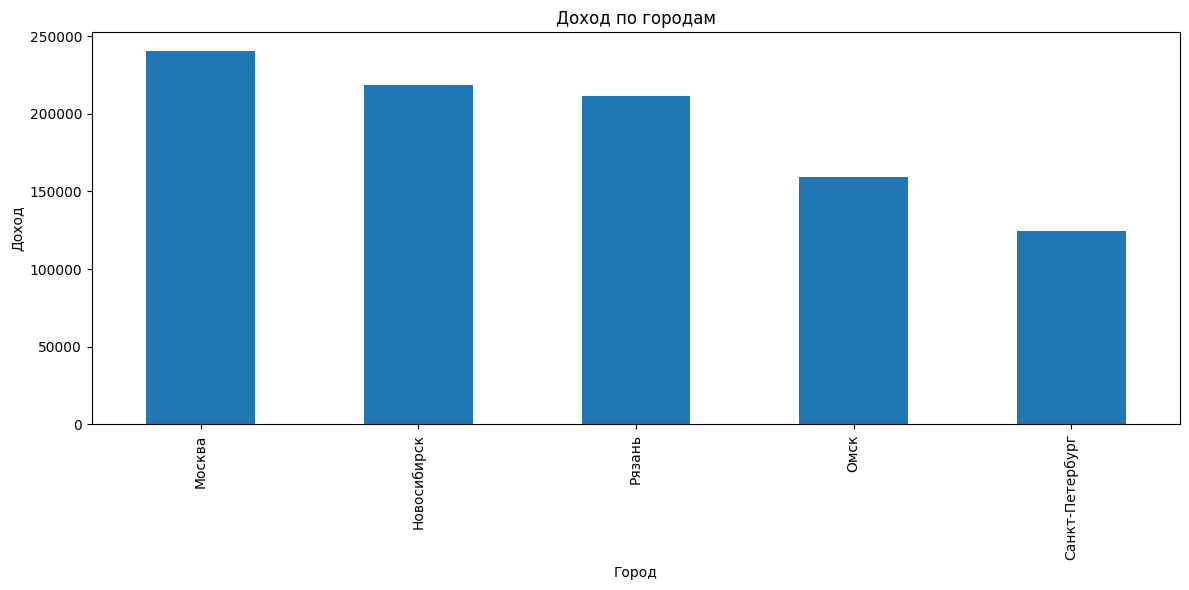

In [ ]:
plt.figure(figsize=(12, 6))
income_by_city.plot(kind='bar')
plt.title('Доход по городам')
plt.xlabel('Город')
plt.ylabel('Доход')
plt.tight_layout()
plt.savefig('income_by_city.png')

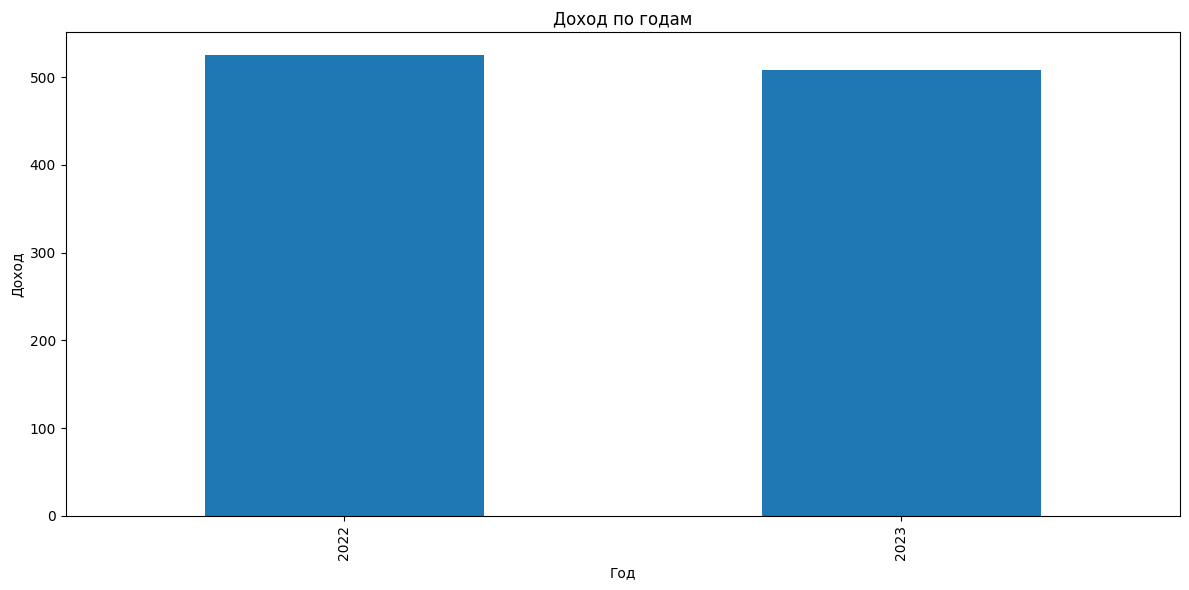

In [ ]:
plt.figure(figsize=(12, 6))
income_by_year.plot(kind='bar')
plt.title('Доход по годам')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.tight_layout()
plt.savefig('income_by_city.png')

In [ ]:
df_consolidated2.to_csv('consolidated_client_data.csv', index=False)
print("\nКонсолидированные данные сохранены в файл 'consolidated_client_data.csv'")


Консолидированные данные сохранены в файл 'consolidated_client_data.csv'
